# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


## Dataset Information

**Nama Dataset:** Heart Disease Dataset  
**Sumber Dataset:**  
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset  

**Deskripsi Singkat:**  
Dataset ini berisi data medis pasien yang digunakan untuk memprediksi
kemungkinan penyakit jantung. Dataset terdiri dari fitur numerik dan kategorikal
seperti usia, tekanan darah, kadar kolesterol, detak jantung maksimum, dan target
klasifikasi (0 = sehat, 1 = sakit jantung).

Tujuan dari eksperimen ini adalah melakukan eksplorasi data, preprocessing,
dan menghasilkan dataset siap latih untuk tahap model training.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
#Type your code here

In [ ]:
# Import library utama
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Konfigurasi visualisasi
sns.set(style="whitegrid")


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
#Type your code here

In [ ]:
# Memuat dataset Heart Disease
url = "https://raw.githubusercontent.com/rikhuijzer/heart-disease-dataset/main/heart-disease-dataset.csv"
df = pd.read_csv(url)

# Menampilkan 5 baris pertama
df.head()


,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,1.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,1.0
4,54.0,1.0,3.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,1.0,0.0


In [ ]:
# Melihat informasi dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   float64
 1   sex                  1190 non-null   float64
 2   chest_pain_type      1190 non-null   float64
 3   resting_bp_s         1190 non-null   float64
 4   cholesterol          1190 non-null   float64
 5   fasting_blood_sugar  1190 non-null   float64
 6   resting_ecg          1190 non-null   float64
 7   max_heart_rate       1190 non-null   float64
 8   exercise_angina      1190 non-null   float64
 9   oldpeak              1190 non-null   float64
 10  st_slope             1190 non-null   float64
 11  target               1190 non-null   float64
dtypes: float64(12)
memory usage: 111.7 KB


In [ ]:
# Statistik deskriptif
df.describe()


,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
# Simpan dataset mentah sebagai heart_raw.csv
df.to_csv("heart_raw.csv", index=False)


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
#Type your code here

4.1 Cek Ukuran & Struktur Data

In [ ]:
# Mengetahui jumlah baris dan kolom
df.shape


(1190, 12)

In [ ]:
# Melihat nama kolom
df.columns


Index(['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'st_slope', 'target'],
      dtype='object')

4.2 Cek Missing Values

In [ ]:
# Mengecek missing values
df.isnull().sum()


,0
age,0
sex,0
chest_pain_type,0
resting_bp_s,0
cholesterol,0
fasting_blood_sugar,0
resting_ecg,0
max_heart_rate,0
exercise_angina,0
oldpeak,0


Dataset tidak memiliki missing values.

4.3 Distribusi Target

In [ ]:
# Distribusi target
df['target'].value_counts()


,count
target,
1.0,629
0.0,561


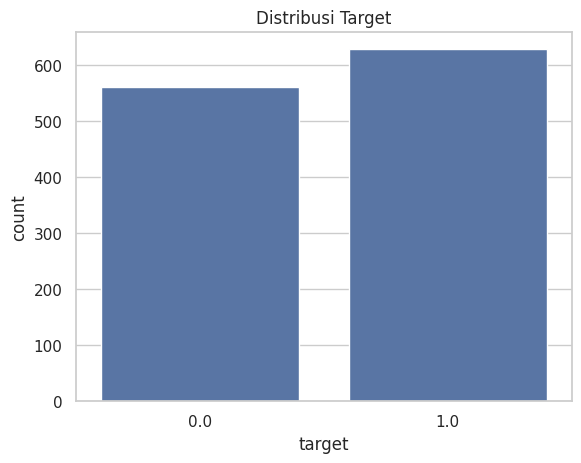

In [ ]:
# Visualisasi distribusi target
plt.figure()
sns.countplot(x='target', data=df)
plt.title('Distribusi Target')
plt.show()


4.4 Statistik Deskriptif

In [ ]:
df.describe()


,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


4.5 Korelasi Fitur

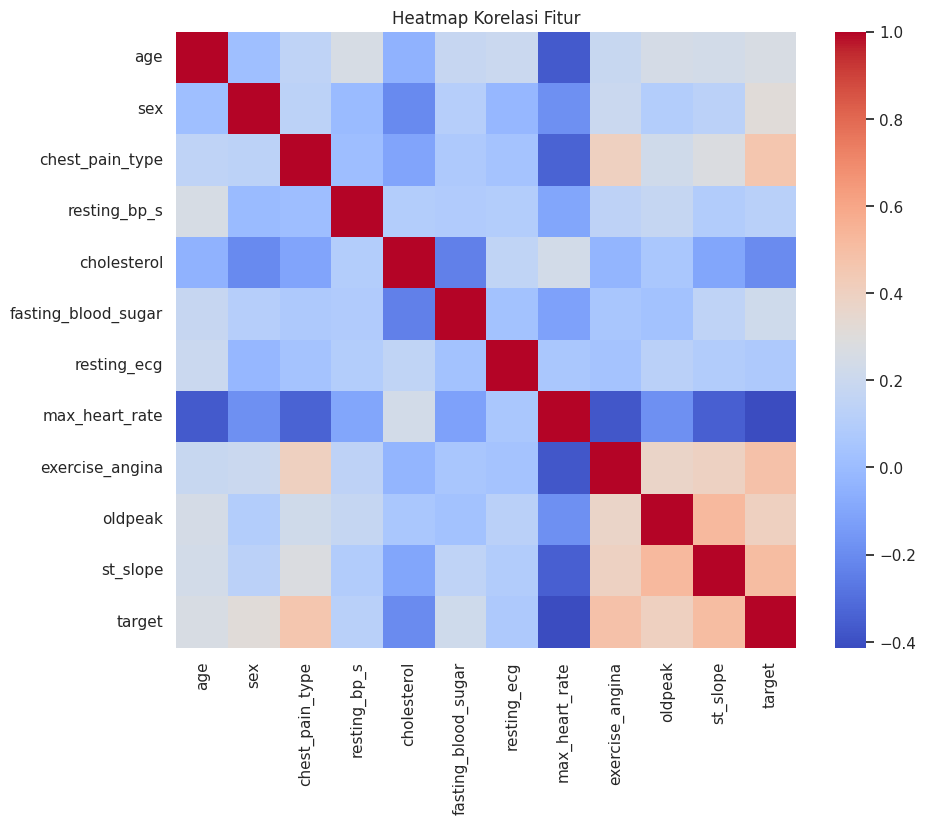

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()


4.6 Distribusi Beberapa Fitur Penting

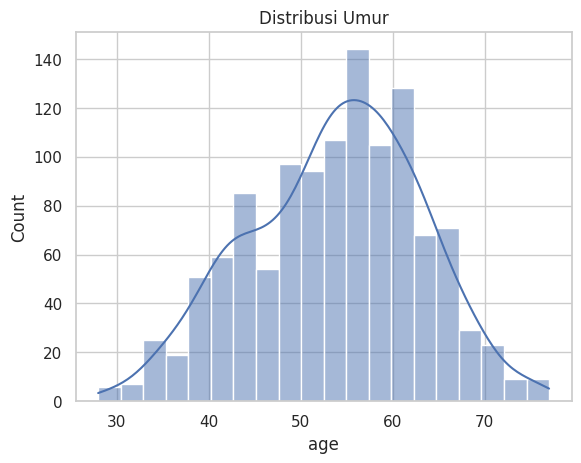

In [ ]:
plt.figure()
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribusi Umur')
plt.show()


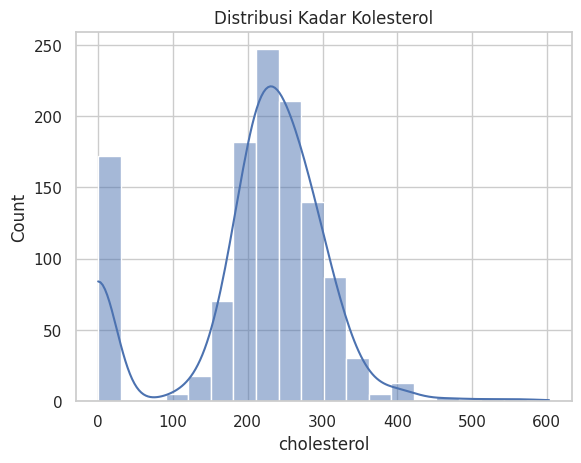

In [ ]:
plt.figure()
sns.histplot(df['cholesterol'], bins=20, kde=True)
plt.title('Distribusi Kadar Kolesterol')
plt.show()


## Hasil Exploratory Data Analysis (EDA)

Berdasarkan hasil eksplorasi data, dataset Heart Disease terdiri dari sejumlah fitur numerik dan
kategorikal dengan target berupa klasifikasi biner. Distribusi target menunjukkan proporsi pasien
dengan dan tanpa penyakit jantung yang relatif seimbang.

Tidak ditemukan missing values pada dataset sehingga data dapat langsung diproses ke tahap
preprocessing. Visualisasi korelasi menunjukkan beberapa fitur memiliki hubungan yang cukup kuat
terhadap target, sehingga berpotensi berpengaruh terhadap performa model machine learning.


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

5.1 Pisahkan Fitur dan Target

In [ ]:
# Memisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']


5.2 Cek Missing Value

In [ ]:
X.isnull().sum()


,0
age,0
sex,0
chest_pain_type,0
resting_bp_s,0
cholesterol,0
fasting_blood_sugar,0
resting_ecg,0
max_heart_rate,0
exercise_angina,0
oldpeak,0


5.3 Scaling Fitur Numerik

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


5.4 Ubah Kembali ke DataFrame

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


5.5 Gabungkan Kembali dengan Target

In [ ]:
df_preprocessed = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)


5.6 Simpan Dataset Hasil Preprocessing

In [ ]:
df_preprocessed.to_csv("heart_preprocessed.csv", index=False)


## Data Preprocessing

Tahap preprocessing dilakukan untuk menyiapkan data agar siap digunakan dalam proses pelatihan model
machine learning. Proses ini meliputi pemisahan fitur dan target, pengecekan missing values, serta
standarisasi fitur numerik menggunakan StandardScaler.

Hasil preprocessing kemudian digabungkan kembali dan disimpan ke dalam bentuk file CSV agar dapat
digunakan pada tahap pemodelan dan otomatisasi preprocessing selanjutnya.
